In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#paramaters
#change all units to: force = pN, length = nm, time = ms
pars = {}
pars['a00'] = -1
pars['a01'] = 1
pars['a10'] = 0
pars['a11'] = -1
pars['gamma0'] = 1
pars['gamma1'] = 1

pars['kb'] = 1.38*10**-2

pars['T0'] = 300
pars['T1'] = 300
pars['noise0'] = 2*pars['gamma0']*pars['kb']*pars['T0']
pars['noise1'] = 2*pars['gamma1']*pars['kb']*pars['T1']


In [3]:
def analytical_soln_acf_generic(omega_list, pars):

    autocorr_list = []
    for omega in omega_list:
        numerator = ( pars['a11']**2 * pars['noise0'] ) \
        + ( pars['a01']**2 * pars['noise1'] ) \
        + ( (omega**2) * (pars['gamma1']**2) * (pars['noise0']) )

        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )

        autocorr = numerator/denominator
        autocorr_list.append(autocorr)
    return autocorr_list

In [4]:
def analytical_soln_imaginary_response(omega_list, pars):
    im_response_list = []
    for omega in omega_list:
        numerator = omega*(
            (pars['gamma1']*pars['a10']*pars['a01']) \
            + (pars['gamma0']*(pars['gamma1']**2)*(omega**2)) \
            + ((pars['a11']**2)*pars['gamma0'])
        )
        
        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )

        
        im_response = numerator/denominator
        im_response_list.append(im_response)
    return im_response_list

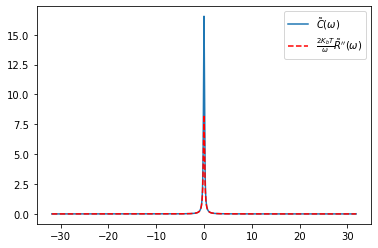

energy_dissipated 2.0568235081221347


In [5]:
omega_list = np.linspace(-200, 200, 10000)
paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
final_imaginary = (np.array(2*pars['kb']*pars['T0'])*np.array(paper_imaginary_soln))/(omega_list)

plt.plot(omega_list/(2*np.pi), np.array(paper_acf_soln), label='$\~{C} (\omega)$')
plt.plot(omega_list/(2*np.pi), np.array(final_imaginary), color='red', ls='dashed', label="$\\frac{2K_bT}{\omega} \~{R}'' (\omega)$")
plt.legend()
plt.show()

delta_omega = omega_list[1] - omega_list[0]
omega_squared = (omega_list)**2

#paper_acf_soln is autocrrelation function
#final_imaginary is imaginary of response function * (2*kBT/omega)
violation_function = (pars['gamma0']/(2*np.pi))*(omega_squared*paper_acf_soln - omega_squared*final_imaginary)
#energy dissipated is the integral of the violation_function
energy_diss = np.sum(violation_function*delta_omega)
print('energy_dissipated', energy_diss)

In [6]:
def analytical_q0(pars):
    numerator = pars['a01']*((pars['a10']*pars['T0'])-(pars['a01']*pars['T1']))
    denominator = (pars['a00']*pars['gamma1']) + (pars['a11']*pars['gamma0'])
    
    return pars['kb']*(numerator/denominator)

def analytical_q1(pars):
    numerator = pars['a10']*((pars['a01']*pars['T1'])-(pars['a10']*pars['T0']))
    denominator = (pars['a00']*pars['gamma1']) + (pars['a11']*pars['gamma0'])
    
    return pars['kb']*(numerator/denominator)

In [7]:
q0 = analytical_q0(pars)
q0

2.07

In [8]:
q1 = analytical_q1(pars)
q1

-0.0

Plotter: change ms to s to match in paper

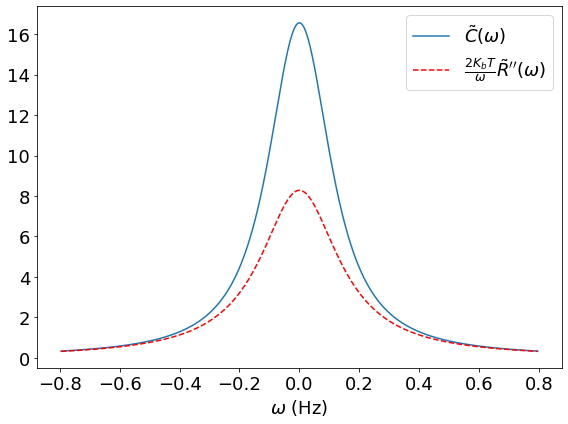

In [9]:
fig = plt.figure(figsize=(8,6))
omega_list = np.linspace(-5, 5, 10000)
paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
final_imaginary = (np.array(2*pars['kb']*pars['T0'])*np.array(paper_imaginary_soln))/(omega_list)

plt.plot(omega_list/(2*np.pi), np.array(paper_acf_soln), label='$\~{C} (\omega)$')
plt.plot(omega_list/(2*np.pi), np.array(final_imaginary), color='red', ls='dashed', label="$\\frac{2K_bT}{\omega} \~{R}'' (\omega)$")

plt.xlabel('$\omega$ (Hz)', fontsize=18)
# plt.ylabel('$nm^2$ $s$', fontsize=12.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={'size': 18})
plt.tight_layout()
plt.savefig('dissipation_sensor_fin.png', dpi=100)
plt.show()

T eff/ T

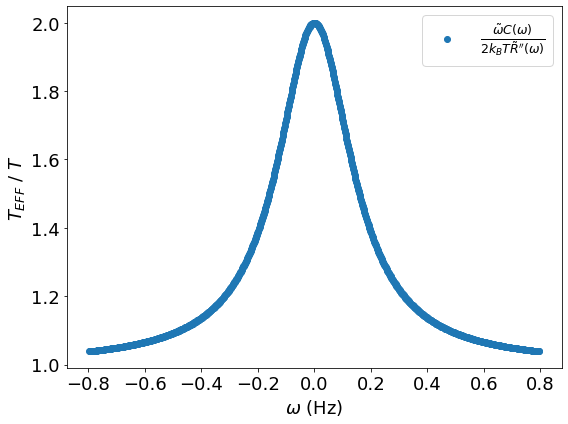

In [12]:
fig = plt.figure(figsize=(8,6))
omega_list = np.linspace(-5, 5, 1000)
paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
final_imaginary = (np.array(2*pars['kb']*pars['T0'])*np.array(paper_imaginary_soln))/(omega_list)

plt.scatter(omega_list/(2*np.pi), paper_acf_soln/final_imaginary, label="$\\frac{\~ \omega {C} (\omega)}{2k_BT \~{R}'' (\omega)}$")

plt.xlabel('$\omega$ (Hz)', fontsize=18)
plt.ylabel('$T_{EFF}$ / $T$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={'size': 18})
plt.tight_layout()
plt.savefig('teff_sensor_fin.png', dpi=100)
plt.show()